# Libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
births = pd.read_csv('../data/processed/totDF_dwnsmpl_clean.csv')

births_nou = births.loc[births['admit_NICU'] != 'U']  


In [3]:
colnames = np.array(births.columns) #useful to reference column names


## Functions

In [3]:
# Mask a category in a feature 
#Example remove all 'U' for target feature
def remove_category(dataframe, column = str, category = str):
    df = dataframe.loc[dataframe[column] != category]
    return df

# Make a dataframe suitable for plotting a stacked bar graph with percentage of total as values for each sub category
def make_pctdf(dataframe , group = str, target = 'admit_NICU',  columns_titles = ['Y','N']):
    df1 = births_nou.loc[(births[group] == 'Y')].groupby([group])[[target]].count()
    df2 = births_nou.loc[(births[group] == 'Y')].groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    return pct_df.T

#Make a dataframe suitable for plotting a bar graph with counts of one subcategory of feature
#For example inlcude only observations marked 'Y', exclude other values
def make_cntdf(dataframe , group = str, filter_output = 'Y', target = 'admit_NICU',  columns_titles = ['Y','N']):
    df1 = births_nou.loc[(births[group] == filter_output)].groupby([group])[[target]].count()
    return df1

#simple stacked bar graph with percentage of total as values for each sub category, for ease of examination
def pct_bplot(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True, legend = False)

#plot time series for target column
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return
#Value counts for target column, and value counts for target column when group be year
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())
    
#save plots, run within plotting cells
def saveplt(filename):
    path = './Saved_Visualizations/'
    file1 = path + filename + '.pdf'
    file2 = path + filename + '.png'
    plt.savefig(file1) #as pdf
    plt.savefig(file2) #as png
    
def pct_bplot2(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[target].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target], df3.columns[1:])))
    pct_df = pct_df.T
    #pct_df.plot(kind = 'bar', stacked = True, legend = True)
    return pct_df
   

# Visualizations


## NICU admittance

<Figure size 1440x1440 with 0 Axes>

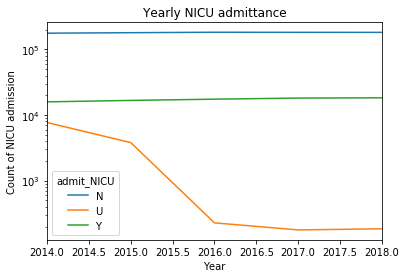

In [5]:
#NICU admittance time series, 2014-2018
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')
plot_gpYR(births,'admit_NICU',"Year","Count of NICU admission", "Yearly NICU admittance",kind='line')

saveplt('NICUadmit_ts')

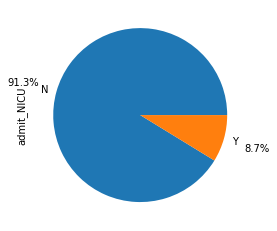

In [6]:
#NICU admit pie chart, all years (2014-2018)
births_nou['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)

saveplt('NICUadmit_allyears_pie')

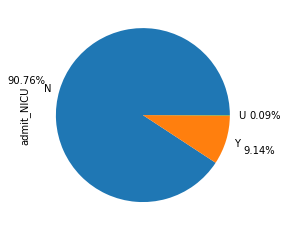

In [7]:
#NICU admit pie chart, year (2018) only, for reference
births.loc[births['birth_year']==2018]['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', pctdistance = 1.4)

In [8]:
births_nou.groupby('birth_year').apply(get_pct('admit_NICU','Y'), axis = 1)




NameError: name 'get_pct' is not defined

In [ ]:
def get_cnt(target = str, dataframe = births_nou):
    return dataframe['admit_NICU'].count()

def get_pct(target= str, subcat = str, dataframe = births_nou):
    pct = 100* (dataframe.loc[dataframe[target] == subcat][target].count())/ get_cnt(target = target, dataframe = dataframe)
    pct  = print("%.2f" %(pct))
    return pct

In [ ]:
testdf = births_nou[['birth_year', 'admit_NICU']]
years = births['birth_year'].unique()

# list[map(lambda x : get_pct(x, 'Y'), testdf.groupby('birth_year')['admit_NICU'])]

In [ ]:
gp_yr = pd.DataFrame(testdf.groupby('birth_year'))
gp_yr.T
#get_pct('admit_NICU','Y',gp_yr)

In [ ]:
get_pct('admit_NICU', 'Y')



In [ ]:
#Admit_NICU time series
# tempdf = remove_category(births_nou, 'admit_NICU', 'N')


# tot_admitNICU = births_nou.groupby(['admit_NICU'] == 'Y')['admit_NICU'].count()
# tot_admitNICU

births_nou['admit_NICU'].sum()

# state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# # Change: groupby state_office and divide by sum
# state_pcts = state_office.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))

## Mother health files

### Mother's BMI

In [7]:
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[10.0,19.0, 25.0,30.0,35.0,40.0,90.0], labels = ['u','h','o','ob1','ob2','ob3'])

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

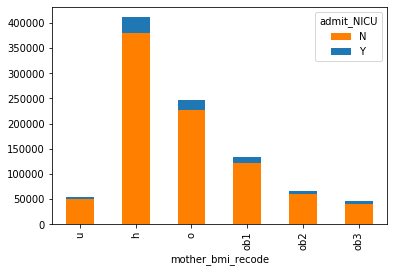

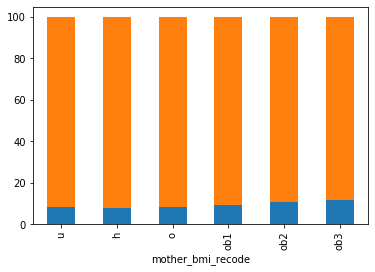

In [8]:
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mother_bmi_recode'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mother_bmi_recode')

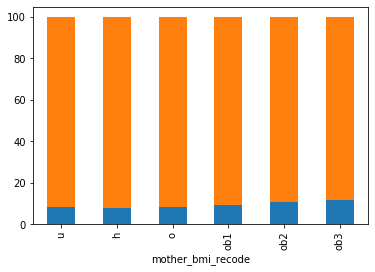

In [9]:
pct_bplot(births,'mother_bmi_recode')

## Mother's Age

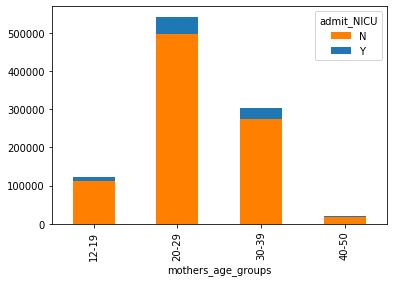

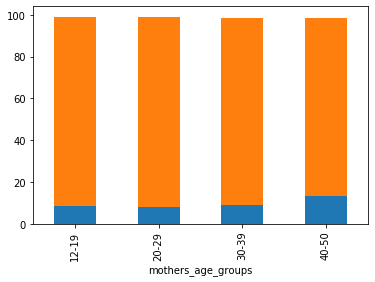

In [10]:
births['mothers_age_groups']= pd.cut(births['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups')

In [ ]:
births['mothers_age'].max()

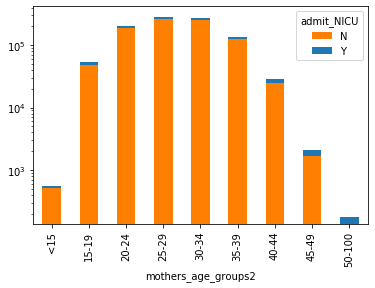

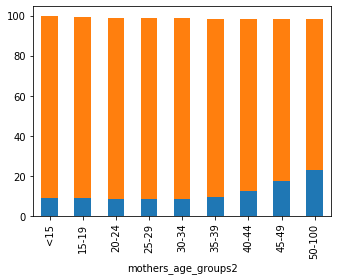

In [11]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_agegrps.pdf')
plt.savefig('./Saved_Visualizations/mother_agegrps.png')

## Prior-termination births

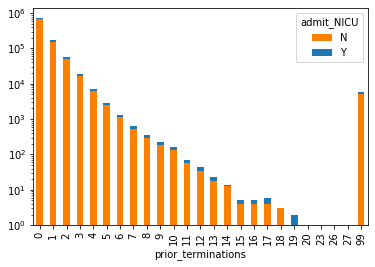

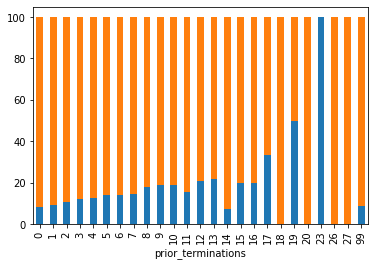

In [12]:
pter_plt = births_nou.groupby(['prior_terminations'])['admit_NICU'].value_counts().unstack()
pter_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_terminations')

# Prior living births

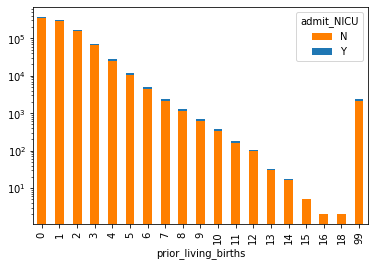

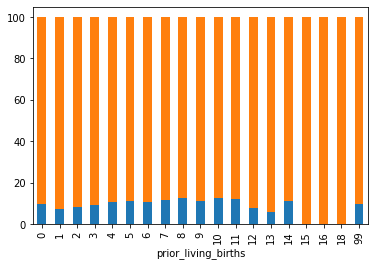

In [13]:
plive_plt = births_nou.groupby(['prior_living_births'])['admit_NICU'].value_counts().unstack()
plive_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_living_births')

## Prior Dead births

In [ ]:
pdead_plt = births_nou.groupby(['prior_dead_births'])['admit_NICU'].value_counts().unstack()
pdead_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_dead_births')

## time from last pregnancy


In [ ]:
#Since last other birth
val_check(births,'mo_since_last_live_birth')
plt.hist(births['mo_since_last_live_birth'])

In [ ]:
#Need to regroup somehows
mo_live_plt = births_nou.groupby(['mo_since_last_live_birth'])['admit_NICU'].value_counts().unstack()
mo_live_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'mo_since_last_live_birth')

In [ ]:
#Since last other birth
val_check(births,'mo_since_last_other_birth')
plt.hist(births['mo_since_last_other_birth'])

# Diabetes

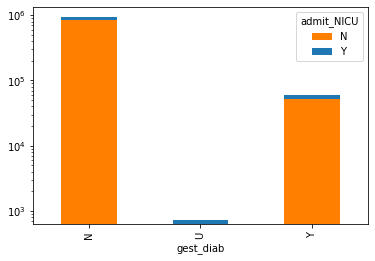

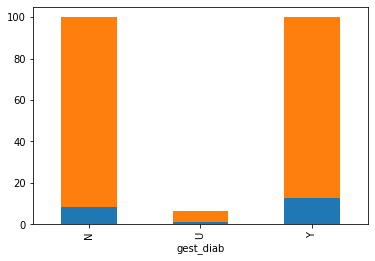

In [14]:
gestdiab_plt = births_nou.groupby(['gest_diab'])['admit_NICU'].value_counts().unstack()
gestdiab_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'gest_diab')

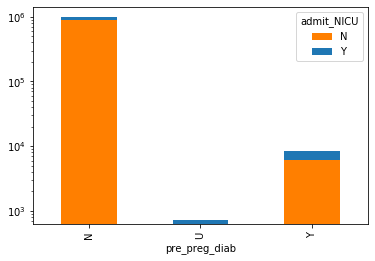

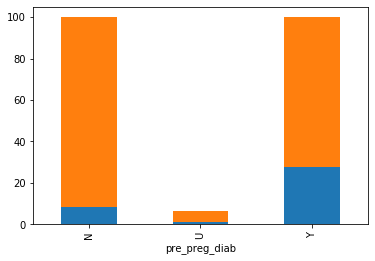

In [15]:
prepregdiab_plt = births_nou.groupby(['pre_preg_diab'])['admit_NICU'].value_counts().unstack()
prepregdiab_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'pre_preg_diab')

## Prenatal visits

In [ ]:
val_check(births,'n_prenatal_visits')
plt.hist(births['n_prenatal_visits'])

In [ ]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

## Mother's Health Risk Factors 

[Text(0, 0, 'Gestational Diabetes'),
 Text(0, 0, 'Pre-pregancy Diabetes'),
 Text(0, 0, 'Gestational Hypertension'),
 Text(0, 0, 'Pre-pregnancy Hypertension'),
 Text(0, 0, 'Hypertension Eclampsia'),
 Text(0, 0, 'Previous Pre-term Birth')]

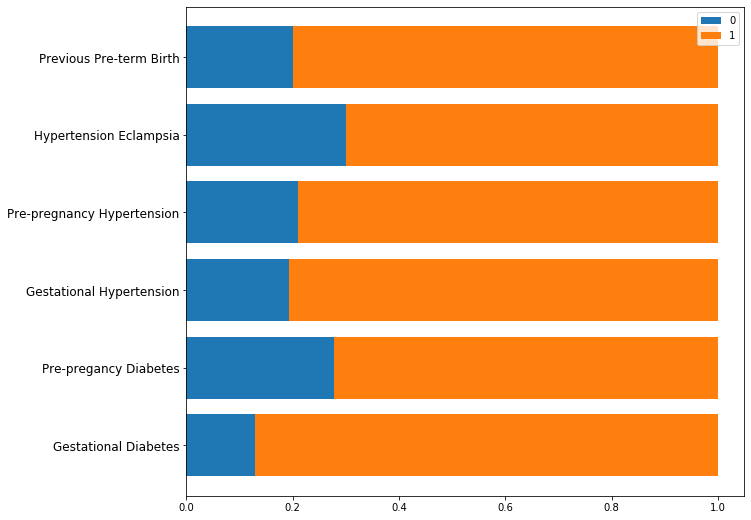

In [17]:
cnames_list = ['gest_diab','pre_preg_diab', 'gest_hypten', 'pre_preg_hypten', 'hypten_ecl', 'prev_preterm_birth']
fullnames_list =['Gestational Diabetes', "Pre-pregancy Diabetes",'Gestational Hypertension', 'Pre-pregnancy Hypertension', 'Hypertension Eclampsia', 'Previous Pre-term Birth']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
# print(test)
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
test_plt.set_yticklabels(fullnames_list, fontsize = 12)

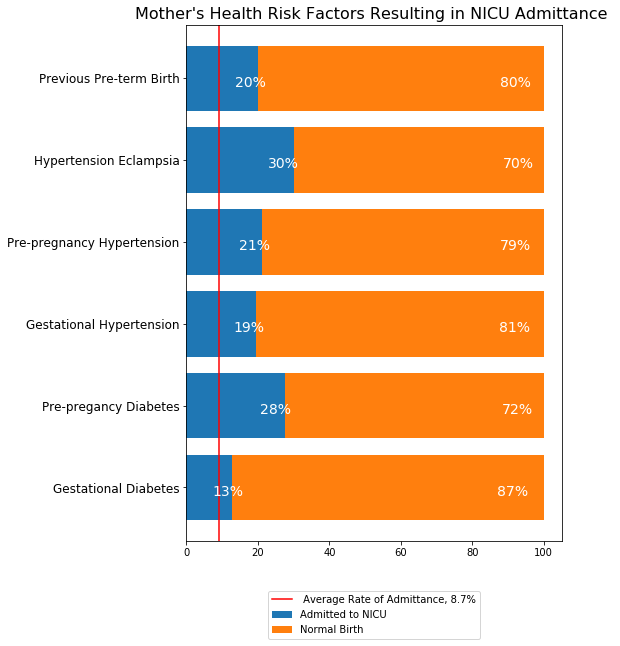

In [18]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(8.7/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_risks_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_risks_barpct.png')

Vertical version template

In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10,7))
#Formatting 
plt.axhline(y=(9.14/100), color='r', linestyle='-', label = '9%')
test_plt.set_xticklabels(fullnames_list)
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'upper right')

#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height - 0.1), ha = 'center', color = 'w')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = .3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(pad = -12, rect = (0,0,.8,.9))



####  Mother's Health Risk Factors Counts  

In [ ]:
cnames_list = ['gest_diab','pre_preg_diab', 'gest_hypten', 'pre_preg_hypten', 'hypten_ecl', 'prev_preterm_birth']
fullnames_list =['Gestational Diabetes', "Pre-pregancy Diabetes",'Gestational Hypertension', 'Pre-pregnancy Hypertension', 'Hypertension Eclampsia', 'Previous Pre-term Birth']
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

In [ ]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels('', fontsize = 12)
test2_plt.set_title("Mother's Health Risk Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/mother_health_risks_barcnt.pdf')
plt.savefig('./Saved_Visualizations/mother_health_risks_barcnt.png')

## Mother's Health Risks Infections

In [ ]:
cnames_list = ['gonorrhea','syphilis', 'chlamydia', 'hepB', 'hepC']
fullnames_list =['Gonorrhea', "Syphilis",'Chlamydia', 'Hepatis B', 'Hepatitis C']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_infections_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_infections_barpct.png')

In [ ]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels('', fontsize = 12)
test2_plt.set_title("Mother's Health Risk Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/mother_health_infections_barcnt.pdf')
plt.savefig('./Saved_Visualizations/mother_health_infections_barcnt.png')

### Delivery type

In [ ]:
cnames_list = ['infertility_treatment','fertil_enhance', 'asst_repro_tech']
fullnames_list =['Infertility Treatment', "Fertility Enhancement",'Assistant Reproductive Technology']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_fertility_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_fertility_barpct.png')

In [ ]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels('', fontsize = 12)
test2_plt.set_title("Mother's Health Risk Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/mother_health_fertility_barcnt.pdf')
plt.savefig('./Saved_Visualizations/mother_health_rfertility_barcnt.png')

## Infant congenital factors

In [ ]:
cnames_list = ['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate', 'cleft_palate_only',
        'hypospadias']
fullnames_list =['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate', 'cleft_palate_only',
         'hypospadias']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

## Need to do a separate graph form down syndrome and suspected chromosomal disorder(Each
# has a third option for pending results)

In [ ]:
colnames


In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Infant's Congenital Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/infant_congenital_barpct.pdf')
plt.savefig('./Saved_Visualizations/infant_congenital_barpct.png')

In [ ]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels(fullnames_list, fontsize = 12)
test2_plt.set_title("Infant's Congenital Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/infant_congenital_barcnt.pdf')
plt.savefig('./Saved_Visualizations/infant_congenital_barcnt.png')

## Delivery Complications


In [ ]:
cnames_list = ['perineal_laceration', 'rupt_uterus',
       'unplanned_hyster', 'admit_to_IC', 'induced_labor', 'aug_labor', 'steriods', 'antibiotics', 'chorioamnionitis']
fullnames_list =['Perineal Laceration', 'Rupture Uterus',
       'Unplanned Hysterectomy', 'Mother Admitted to IC', 'Induced Labor', 'AugLabor', 'Steroids', 'Antibiotics','Chorioamnionitis' ]
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Delivery Incident Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/delivery_risks_barpct.pdf')
plt.savefig('./Saved_Visualizations/delivery_risks_barpct.png')

In [ ]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh',  logx = True, width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels(fullnames_list, fontsize = 12)
test2_plt.set_title("Delivery Incident Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/delivery_risks_barcnt.pdf')
plt.savefig('./Saved_Visualizations/delivery_risks_barcnt.png')

In [ ]:
## APGAR Score

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

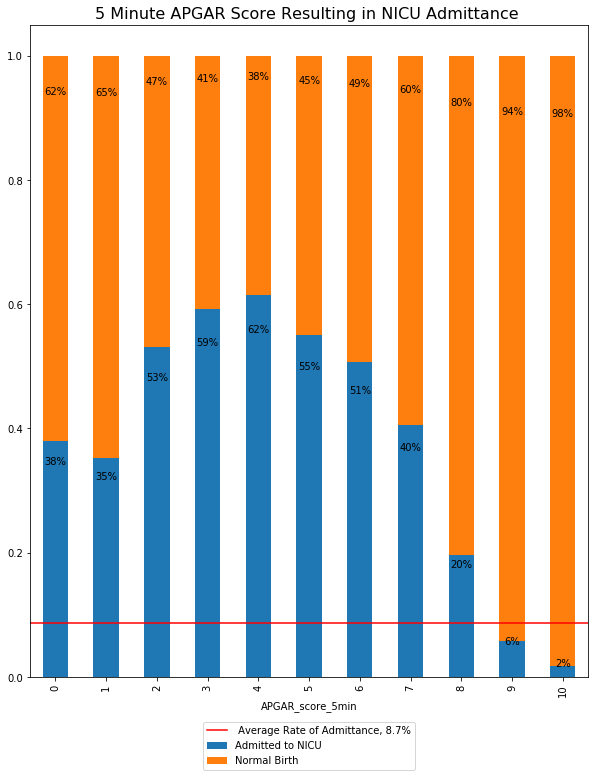

In [9]:
births_nou2 = remove_category(births_nou,'APGAR_score_5min',88)
births_nou3 = remove_category(births_nou2,'APGAR_score_5min',99)
test = pct_bplot2(births_nou3,'APGAR_score_5min')
test_plt = test.plot(kind = 'bar', stacked = True, legend = True,figsize=(10,12))
plt.axhline(y=8.7/100, color='r', linestyle='-', label = '9%')
#test_plt.set_xticklabels(fullnames_list)
test_plt.set_title("5 Minute APGAR Score Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height*.9), ha = 'center', color = 'black')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)
# Change to location of the legend. 
yOffset = -.15
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)
#(left, bottom, right, top)
#plt.tight_layout(rect = (0,0,1.1,1))
plt.savefig('./Saved_Visualizations/apgar5_barpct2.pdf')
plt.savefig('./Saved_Visualizations/apgar5_barpct2.png')









In [ ]:
births_nou2 = remove_category(births_nou,'APGAR_score_10min', 88)
births_nou3 = remove_category(births_nou2,'APGAR_score_10min', 99)
test = pct_bplot2(births_nou3,'APGAR_score_10min')

test_plt = test.plot(kind = 'bar', stacked = True, legend = True,figsize=(10,12))
plt.axhline(y=8.7/100, color='r', linestyle='-', label = '9%')
#test_plt.set_xticklabels(fullnames_list)
test_plt.set_title("10 Minute APGAR Score Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height*.9), ha = 'center', color = 'black')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)
# Change to location of the legend. 
yOffset = -.15
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)
#(left, bottom, right, top)
#plt.tight_layout(rect = (0,0,1.1,1))
plt.savefig('./Saved_Visualizations/apgar10_barpct2.pdf')
plt.savefig('./Saved_Visualizations/apgar10_barpct2.png')


# plurality

In [ ]:
# births_nou = remove_category(births_nou,'APGAR_score_10min',88)
# births_nou2 = remove_category(births_nou,'plurality',5)
test = pct_bplot2(births_nou,'plurality')
fullname_list = ['1','2','3','4','5+']
test_plt = test.plot(kind = 'bar', stacked = True, legend = True,figsize=(10,12),)
plt.axhline(y=8.7/100, color='r', linestyle='-', label = '9%')
test_plt.set_xticklabels(labels = fullname_list, rotation = 0)
test_plt.set_title("Plurality Resulting in NICU Admittance ", fontsize = 16)
test_plt.set_xlabel('Number of Children at Delivery')
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height*.9), ha = 'center', color = 'black')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)
# Change to location of the legend. 
yOffset = -.15
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)
#(left, bottom, right, top)
#plt.tight_layout(rect = (0,0,1.1,1))
plt.savefig('./Saved_Visualizations/plurality_barpct.pdf')
plt.savefig('./Saved_Visualizations/plurality_barpct.png')

## Delivery Type

In [ ]:
# births_nou = remove_category(births_nou,'APGAR_score_10min',88)
births_nou2 = remove_category(births_nou,'final_delivery_method',9)
test = pct_bplot2(births_nou2,'final_delivery_method')
fullnames_list = ['Spontaneous', 'Forceps', 'Vacuum', 'Cesarean']
test_plt = test.plot(kind = 'bar', stacked = True, legend = True,figsize=(10,12))
plt.axhline(y=8.7/100, color='r', linestyle='-', label = '9%')
test_plt.set_xticklabels(fullnames_list, rotation = 0)
test_plt.set_title("Delivery Methods Resulting in NICU Admittance ", fontsize = 16)
test_plt.set_xlabel('')

leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'best')
#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height*.9), ha = 'center', color = 'black')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)
# Change to location of the legend. 
yOffset = 0
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)
#(left, bottom, right, top)
#plt.tight_layout(rect = (0,0,1.1,1))
saveplt('delivery_method')

## Last minute graphs

In [ ]:
colnames

In [2]:
cnames_list = ['assist_vent_immed',
       'assist_vent_after6', 'surfactant', 'antibiotics_for_newborn']
fullnames_list =['Assist Ventilation Immediately',
       'Assist Ventilation > 6hr', 'Surfactant', 'Antibiotics for Newborn',
       ]
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

NameError: name 'pd' is not defined

In [ ]:
dict = { cnsmrd :[[]], fullnames : [[]] }

In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Infant Delivery Incident Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.6*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
saveplt('infant_delivery_risks_barpct')

In [ ]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh',  logx = True, width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels(fullnames_list, fontsize = 12)
test2_plt.set_title("Delivery Incident Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


saveplt('infant_delivery_risks_barcnt')

## baby weights

In [ ]:
births_nou['bw_recode'] = pd.cut(births_nou['birth_weight_gm'],
                                   [0,499, 999,1499,1999,2499,2999,3499,3999,4499,4999,8200])

In [ ]:
# births_nou = remove_category(births_nou,'APGAR_score_10min',88)
# births_nou2 = remove_category(births_nou,'final_delivery_method',9)
test = pct_bplot2(births_nou,'bw_recode')
fullnames_list = ['<500', '1000', '1500', '2000','2500','3000','3500','4000','4500', '5000', '5500+']
test_plt = test.plot(kind = 'bar', stacked = True, legend = True,figsize=(10,12))
plt.axhline(y=8.7/100, color='r', linestyle='-', label = '9%')
test_plt.set_xticklabels(fullnames_list, rotation = 0)
test_plt.set_title("Baby Delivery Weight Resulting in NICU Admittance ", fontsize = 16)
test_plt.set_xlabel('Weight in Grams')

leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'best')
#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height*.8), ha = 'center', color = 'black')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)
# Change to location of the legend. 
yOffset = 0
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)
#(left, bottom, right, top)
#plt.tight_layout(rect = (0,0,1.1,1))
saveplt('baby_wt_barpct')

## Feature importance scatter


In [6]:
cnames_list = ['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate',
        'hypospadias']
fullnames_list =['Seizures',
       'Anencephaly', 'Meningo_Spina_Bif', 'CCHD',
       'CDH', 'Omphalocele', 'Gastroschisis',
       'Reduced limb', 'Cleft Lip or Palate', 
        'Hypospadias']
# prep = pd.concat(map( lambda cname: remove_category( births_nou, cname ), cnames_list ))
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

In [44]:
def plt_scatter2(df_x,df_y,title):
    x = pd.DataFrame(df_x[0])
    x = x.reset_index()
    y = pd.DataFrame(df_y)
    y = y.reset_index()

    temp = plt.scatter(x = df_x[0], y = df_y)
    plt.title(title)
    plt.xlabel('Percentage Admitted')
    plt.ylabel('Count admitted')
    

    # plt.axhline(y=8.7/100, color='r', linestyle='-')
    ylim = plt.ylim()
    xlim = plt.xlim()
    xmid = xlim[1]/2
    ymid = ylim[1]/2
    print(ylim, ymid)
    print(xlim,xmid)
    plt.axvline(x = xmid, color='r', linestyle='-')
    plt.axhline(y = ymid, color='r', linestyle='-')
    plt.grid()
    for i, txt in enumerate(fullnames_list):
        plt.annotate(txt, (x[0][i], y['admit_NICU'][i]))
    plt.tight_layout(rect = (0,0,1,1))
    saveplt(title)

(62.5848233995585, 643.4151766004416) 321.7075883002208
(18.399234278266533, 93.41894753991528) 46.70947376995764


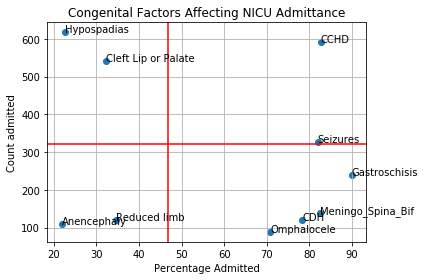

In [45]:
plt_scatter2(test,test2,'Congenital Factors Affecting NICU Admittance')

In [ ]:
x = pd.DataFrame(test[0])
x = x.reset_index()
y = pd.DataFrame(test2)
y = y.reset_index()

plt.scatter(x = test[0], y = test2, )
plt.title('test')
plt.xlabel('Percentage Admitted')
plt.ylabel('Count admitted')

# plt.axhline(y=8.7/100, color='r', linestyle='-')
# plt.axvline(x=length axis/2, color='r', linestyle='-')
plt.grid()

for i, txt in enumerate(fullnames_list):
    plt.annotate(txt, (x[0][i], y['admit_NICU'][i]))
    




In [ ]:
scat_plot  = plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, 
                         norm=None, vmin=None, vmax=None, alpha=None, linewidths=None,
                         verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]

In [47]:
cnames_list = ['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate', 'cleft_palate_only',
        'hypospadias']
fullnames_list =['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate', 'cleft_palate_only',
         'hypospadias']

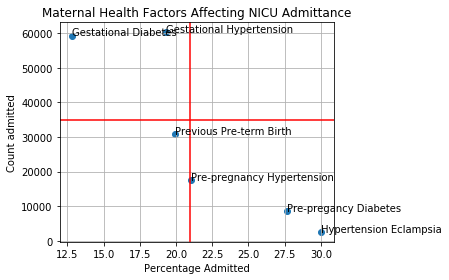

In [48]:
cnames_list = ['gest_diab','pre_preg_diab', 'gest_hypten', 'pre_preg_hypten', 'hypten_ecl', 'prev_preterm_birth']
fullnames_list =['Gestational Diabetes', "Pre-pregancy Diabetes",'Gestational Hypertension', 'Pre-pregnancy Hypertension', 'Hypertension Eclampsia', 'Previous Pre-term Birth']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))
plt_scatter(test,test2,'Maternal Health Factors Affecting NICU Admittance')
   

In [46]:
def plt_scatter(df_x,df_y,title):
    x = pd.DataFrame(df_x[0])
    x = x.reset_index()
    y = pd.DataFrame(df_y)
    y = y.reset_index()

    plt.scatter(x = df_x[0], y = test2, )
    plt.title(title)
    plt.xlabel('Percentage Admitted')
    plt.ylabel('Count admitted')

    # plt.axhline(y=8.7/100, color='r', linestyle='-')
    plt.axvline(x = 21, color='r', linestyle='-')
    plt.axhline(y = 35000, color='r', linestyle='-')
    plt.grid()

    for i, txt in enumerate(fullnames_list):
        plt.annotate(txt, (x[0][i], y['admit_NICU'][i]))
    
    plt.tight_layout(rect = (0,0,1.05,1))

    saveplt(title)

In [ ]:
 Weeks of prenatal care
Weeks of gestation
10 minute APGAR score
Final delivery method
Assisted ventilation immediately
Mother’s age
Antibiotics for newborn
Number of previous Cesareans
Mother’s BMI
Antibiotics for mother



In [ ]:
 Weeks of prenatal care
Chorioamnionitis during labor
Birth weight (g)
Plurality
Weeks of gestation
Labor tried or not
5 minute APGAR score
10 minute APGAR score
Antibiotics for newborn
Number of prenatal visits
Assisted ventilation immediately
Months since last birth
Assisted ventilation for > 6 hrs
Antibiotics during labor
Infant transfer
No risk factors
Steroids during labor
Prior living births
Final delivery method
Gestational Hypertension
